<a href="https://colab.research.google.com/github/farisazizy/Bank-Marketing-EDA/blob/main/GG_3_0_Module_5_Day_2_Customer_Campaign_Segmentation_Participant_Worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

- In the previous notebook, we have explored the data and got to know a little bit more about the insight it holds.

- In this notebook, we are going to use the same dataset to segment customers into different groups to help making the decision on how we best approach each group of customer.

- We are going to use `bank-additional-full-alt.csv` for this module.

- The dataset can be obtained from [this website](https://archive.ics.uci.edu/dataset/222/bank+marketing)

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# Import Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/binggas/public-dataset/main/bank%2Bmarketing/bank-additional/bank-additional-full-alt.csv")
df.head()

# Add Customer ID column

- Create a `customer_id` column using combination of `age`, `job`, `marital`, `education`, `housing`, and `loan` columns.

In [ ]:
# Add customer ID

df["customer_id"] = df["age"].astype(str) + '_'


df.head()

# Segmentation

## Step 1

- We are going to start our customer segmentation process by doing simple statistics to understand the distribution for the variables we are interested in.

- We will try by looking into the `mean`, `median`, `minimum value`, `maximum value`, `25th percentile`, `75th percentile`, and `95th percentile`.


- In the cell below, calculate the `contact_per_campaign` for per `customer_id` and `campaign`.

- Save the result into a DataFrame called `campaign_count`.

In [ ]:
# Find the number of row by customer_id and campaign.
campaign_count =

# Rename the result column into `contact_per_campaign`
campaign_count.rename(columns={0:"contact_per_campaign"}, inplace=True)

# Show the first 5 row
campaign_count.head()

- Now we want to do almost the same thing but per `customer_id`, `campaign`, and `y`.

- If you remember from the last notebook, we used the similar method to calculate each campaign conversion rate. Now, this step will help us calculate the response rate for every customer and campaign.

- Save the result into a DataFrame called `campaign_respond_count`.

In [ ]:
# Find the number of row by customer_id, campaign, and y.
campaign_respond_count =

# Rename the result column into `count_respond`


# Only get the result where y = yes
campaign_respond_count = campaign_respond_count.loc[(slice(None), slice(None), "yes"), :]


# Show the first 5 row


- The two DataFrame's that we have made will allow us to get the `response_rate` for every `customer_id` and `campaign`.

- Use `.merge()` function to combine the two DataFrame's together. Make sure to pay attention to the variables you join the two DataFrame's with.

- Save the result into a DataFrame called `campaign_response`.

- Save the response rate result into a column called `response_rate`. Response rate is calculated by dividing `count_respond` with `contact_per_campaign`.

In [ ]:
# Merge campaign_respond_count with campaign_count
campaign_response =

# Calculate response_rate
campaign_response["response_rate"] =

# Show the first 5 row


- The next DataFrame we are going to make is to calculate the statistics per `customer_id`.

- We want to know:
  1. `contact_frequency`: Frequency of contact per `customer_id`
  2. `sum_duration_of_contact`: Sum of duration of all contact per `customer_id`
  3. `avg_duration_of_contact`: Average of duration of all contact per `customer_id`
  4. `campaign_engagement_cnt`: Number of unique campaign per `customer_id`


- Save the result into a DataFrame called `customer_agg`.

In [ ]:
# Aggregate data per customer_id
customer_agg = df.groupby("customer_id").agg({"customer_id":"count",
                                              })

# If multiindex, use the code below to flatten the columns
customer_agg.columns = customer_agg.columns.get_level_values(1)

# Rename the columns appropriately
customer_agg.rename(columns={
                             })

# Show the first 5 row


- Next, we want to categorize each `campaign_engagement_cnt`.

- This step of labelling helps to convert a numerical variable into a categorical one.

- This step is often usefull in translating data into a more digestable form, depending on business domain.

- In this case, based on business domain, we want to categorize them into a new variable called `campaign_engagement_level`:

|Group | Label |
|-|-|
|`campaign_engagement_cnt` = 1| `1 Campaign`|
|1 < `campaign_engagement_cnt` < 5| `2-4 Campaign`|
|`campaign_engagement_cnt` >= 5| `5+ Campaign`|

In [ ]:
# Label for `1 Campaign`
customer_agg.loc[customer_agg["campaign_engagement_cnt"] == 1,"campaign_engagement_level"] = "1 Campaign"

# Label for `2-4 Campaign`


# Label for `5+ Campaign`


In [ ]:
# Check if the logic works by showing the first 5 row


In [ ]:
# Sanity check the result by aggregating row count for every `campaign_engagement_level` and `campaign_engagement_cnt`


- Now that we have 2 DataFrames for campaign response per `customer_id` (`campaign_response`) and statistics per `customer_id` (`customer_agg`), we can combine them to finally explore the distribution of the data.

- Merge the two DataFrame's by `customer_id` into a new DataFrame called `campaign_merge`.

In [ ]:
campaign_merge = campaign_response.merge(customer_agg, how="inner", left_index=True, right_index=True)
campaign_merge.head()

- Now we want to check the distribution.

- The pre-defined functions below will help you aggregate the 25th, 50th, 75th, and 95th percentile quickly. Try using them in an `.agg()` function.

- Calculate distribution statistics for response_rate per `campaign_engagement_level`.

- Try to aggregate these values:
  - minimum
  - average
  - maximum
  - 25th percentile
  - 50th percentile
  - 75th percentile
  - 95th percentile

In [ ]:
# Defining function for 25th Percentile
def p25(x):
    return np.percentile(x,0.25)


# Defining function for 50th Percentile
def p50(x):
    return np.percentile(x,0.5)


# Defining function for 75th Percentile
def p75(x):
    return np.percentile(x,0.75)


# Defining function for 95th Percentile
def p95(x):
    return np.percentile(x,0.95)

In [ ]:
# Calculate distribution statistics for response_rate per campaign_engagement_level
campaign_engagement_level = campaign_merge.groupby("campaign_engagement_level").agg({"response_rate": ["min"]})

# Flatten multiindex column
campaign_engagement_level.columns =

# Reset index


# Show the result


Discuss!

- What can we learn from the distribution above?

- Which campaign engagement level has better chance of response?

- Which campaign engagement level has skewed distribution? (cue: pay attention to the difference between mean and median).

### Bonus exercise

- Try to melt a wide-format DataFrame into a long-format DataFrame using [`pd.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html).

- If you got it right, your previous DataFrame (`campaign_engagement_level`) should look like this:

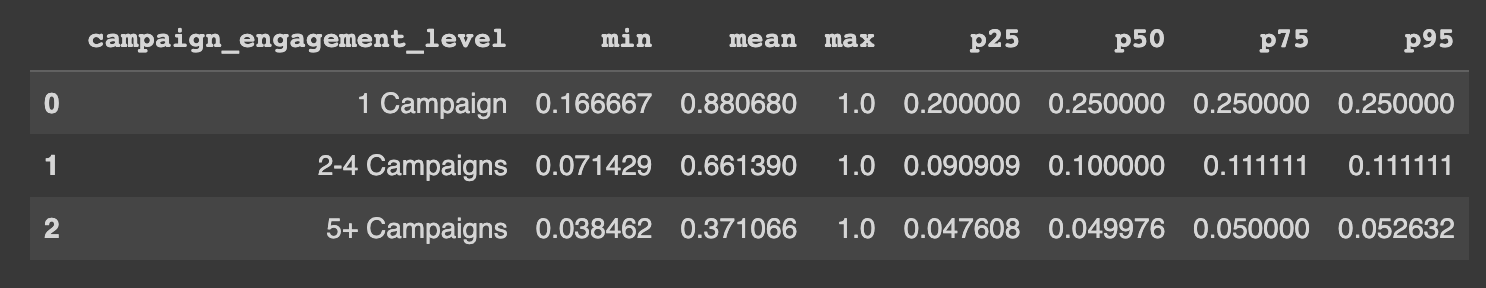




- Now, we want to melt the DataFrame to look something like this:

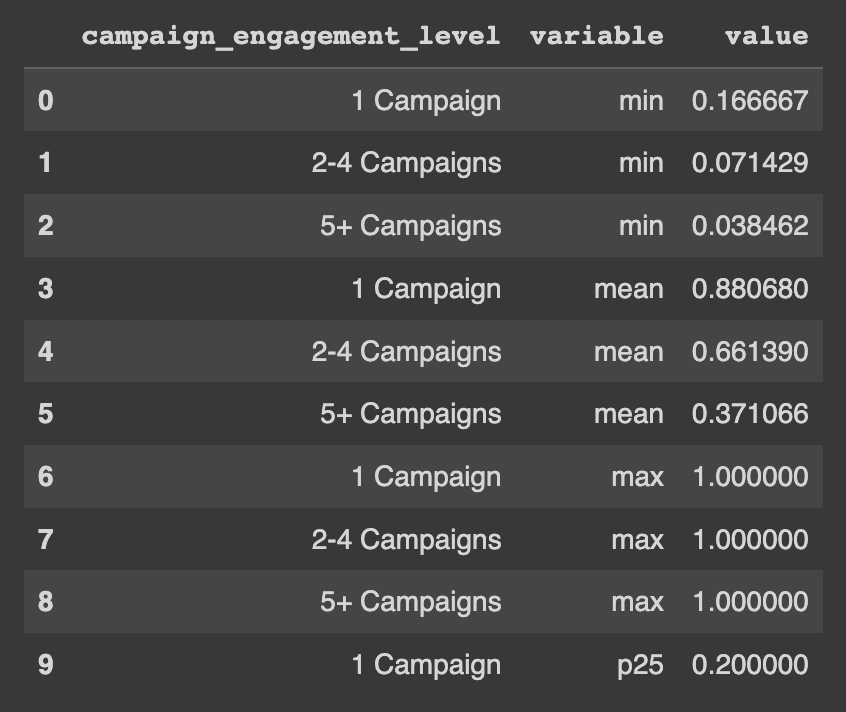

In [ ]:
# Melt the previous DataFrame and save it into a new DataFrame called campaign_engagement_melt

campaign_engagement_melt = pd.melt(campaign_engagement_level, id_vars=, value_vars=)


campaign_engagement_melt.head(10)

- Draw a plot to help us understand the data above.

- What would be your graph of choice? Why?

- Mess around, try different graphs, and share in class!

In [ ]:
# Draw plot to help us understand the data above. What would be your plot of choice?


# Show the plot


#Step 2: Define Engagement Level Labels

- Define engagement level labels that align with the stakeholders' objectives.
- For example:
  - Highly Engaged:
    - Customers who have high contact frequency, long duration of contact, and high campaign engagement.
  - Moderately Engaged:
    - Customers with moderate contact frequency, duration of contact, and campaign engagement.
  - Low Engagement:
    - Customers with low contact frequency, short duration of contact, and low campaign engagement.


- In this step the data team usually give insight about the distribution of the data, but the segmentation is done by multiple teams to combine as much context as possible.

- The definition has been provided below through communication and deliberation with the other teams in the company.

- But, if you want to quickly glimpse at the data, use `.describe()` function on `campaign_merge` to get a quick statistic for all numerical column.

In [ ]:
# Describe numerical columns


# Step 3: Calculate score based on threshold

- To make it simple, below is the definition and the thresholds that you will need to segment every customer based on different variables.

- Each will be converted to a score between `1 and 3` and later, we will combine all the composite variables into a single score based on pre-defined weight.

</br>
</br>

### Contact Frequency

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|<= 2|
|2|Moderately Engaged	|> 2 and <= 4|
|3|Highly Engaged|	> 4|


</br>
</br>


### Duration of Contact

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|<= 500|
|2|Moderately Engaged|	> 500 and <= 1000|
|3|Highly Engaged|	> 1000|



</br>
</br>


### Average Duration of Contact

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|<= 200|
|2|Moderately Engaged|	> 200 and <= 400|
|3|Highly Engaged|	> 400|



</br>
</br>


### Campaign Engagement

| |Engagement Level|Threshold/Range|
|-|-|-|
|1|Low Engagement	|1 campaign|
|2|Moderately Engaged|2-4 campaign|
|3|Highly Engaged|5+ campaign|


</br>
</br>


### Campaign Conversion Rate

| | |Engagement Level|Threshold/Range|
|-|-|-|-|
|1|1 campaign|	Low Engagement|	<= 0.5|
|2| |Moderately Engaged|	> 0.5 and <= 0.75|
|3| |Highly Engaged|	> 0.75|
|1|2-4 campaign|	Low Engagement|	<= 0.5|
|2| |Moderately Engaged|	> 0.5 and <= 0.75|
|3| |Highly Engaged|	> 0.75|
|1|5+ campaign|	Low Engagement|	<= 0.25|
|2| |Moderately Engaged|	> 0.25 and <= 0.5|
|3| |Highly Engaged|	> 0.5|






In [ ]:
# copy campaign_merge into a new DataFrame called campaign_score
campaign_score =

# reset index


# show first 5 rows


- Before we move on, we want to collect the median `response_rate` per `customer_id` and put it into a new column called `campaign_rate_per_customer`.

- Save the aggregate data into a new DataFrame called `campaign_rate_per_customer`.

In [ ]:
# Get 50th percentile response_rate, group by customer_id. Save it into campaign_rate_per_customer
campaign_rate_per_customer =

# Rename to result column to be campaign_rate_per_customer


# Merge campaign_score with campaign_rate_per_customer by customer_id
campaign_score = campaign_score.merge(, how="left", on="customer_id")

# Show first 5 rows


- Now we are ready for the scoring process, refering to the tables above.

- Get 5 parts of the composite scores:
  1. `contact_frequency_score`
  2. `duration_of_contact_score`
  3. `avg_duration_of_contact_score`
  4. `campaign_rate_score`
  5. `campaign_engagement_score`

In [ ]:
# Contact frequency: contact_frequency_score

campaign_score.loc[campaign_score["contact_frequency"] <= 2,"contact_frequency_score"] = 1




# Duration of Contact: duration_of_contact_score

campaign_score.loc[campaign_score["sum_duration_of_contact"] <= 500,"duration_of_contact_score"] = 1


# Avg Duration of Contact: avg_duration_of_contact_score



# Campaign Rate: campaign_rate_score

campaign_score.loc[(campaign_score["campaign_engagement_cnt"] < 5) & (campaign_score["campaign_rate_per_customer"] <= 0.5), "campaign_rate_score"] = 1



campaign_score.loc[(campaign_score["campaign_engagement_cnt"] >= 5) & (campaign_score["campaign_rate_per_customer"] <= 0.25), "campaign_rate_score"] = 1



# Campaign Engagement: campaign_engagement_score


In [ ]:
# Show the first 5 rows


- Now, we will combine the 5 parts composite into a single final score based on the weight decided by stakeholders.

</br>

|Metric|Weight by stakeholder|
|-|-|
| Contact Frequency	| 8 |
| Duration of Contact	| 7 |
| Average Duration of Contact	| 6 |
| Campaign Engagement	| 5 |
| Campaign Conversion Rate |	9 |

</br>

- Calculate the final score and save it into a new column called `overall_engagement_score`.

In [ ]:
# Calculate the final score
campaign_score["overall_engagement_score"] = (campaign_score["contact_frequency_score"] * 8) +

- What to do with the final score?

- The score will help us to finally segment all customers based on this thresholds:

</br>

|Threshold|`engagement_category`|
|-|-|
|overall_engagement_score <=48|Low engagement|
|48 < overall_engagement_score <= 68|Moderate engagement|
|overall_engagement_score > 68|Highly engaged|

In [ ]:
# Categorize based on threshold, save it into a new column called `engagement_category`



In [ ]:
# Sanity check the result using `.value_counts()` function


# Step 5: Check Percentage

- We now have labeled every customer into different engagement category.

- The last step is to know how many of the users from each `campaign` labelled into each `engagement_category`.

- To do that, we need to create a few more DataFrame's.

- First up, get unique `customer_id` per campaign.

- Save the result into a DataFrame called `campaign_level_agg`.

In [ ]:
# Find unique customer_id per campagin
campaign_level_agg =

# Rename the result column into `total_unique_customer`


# Show first 5 rows


- Next, we need a DataFrame for the number of unique `customer_id` per `campaign` and `y`.

- Save the result into a DataFrame called `campaign_level_respond_agg`.

- Only get data where `y = "yes"`.

In [ ]:
# Find unique customer_id per campaign and y
campaign_level_respond_agg =

# Rename the result column into `responded_customers`


# Get only data with y="yes"


# Show first 5 rows


- We can now get `campaign_cvr_rate` by combining the 2 DataFrame's we have just made and calculating the conversion rate by dividing `responded_customers` to `total_unique_customer`.

In [ ]:
# Merge campaign_level_respond_agg with campaign_level_agg
campaign_level_merge =

# Calculate campaign_cvr_rate
campaign_level_merge["campaign_cvr_rate"] =

# Drop index / column `y`, we don't need it anymore
campaign_level_merge = campaign_level_merge.droplevel(1)

# Show first 5 rows


- One more DataFrame to make.

- We need to find unique `customer_id` per `campaign` and `engagement_category` and save it into a DataFrame called `campaign_engagement_agg`.

In [ ]:
# Get unique customer_id per campaign and engagement_category
campaign_engagement_agg =

# Rename the result column into `customer_cnt`


# Show first 10 rows


- FINALLY, we can get the percentage of each campaign and engagement category.

- AS usual, merge and calculate!

- `percentage` = `customer_cnt` / `total_unique_customer`

In [ ]:
# Merge campaign_engagement_agg with campaign_level_merge
campaign_final_merge =

# Calculate percentage
campaign_final_merge["percentage"] =

# Show first 5 rows


- Last one for today, create a graph to show the data in a straightforward manner.

- Try to answer this question: Which campaign give the highest probabilty of engagement?

- What graph would you choose? Choose wisely.

# End of Notebook